In [10]:
import glob # for pathname matching
import os # for path.basename
import pandas as pd # pandas
import seaborn as sns # For graphics
import numpy as np # for array
import re # regular expressions
from iso3166 import countries # contains the country names and their ISO 3166-1 alpha-2 codes
from matplotlib import pyplot as plt # for plotting
from tqdm.auto import tqdm # for progress bar
sns.set(rc={'figure.figsize':(11.7,8.27)})  # set figure size
tqdm.pandas()  # progress bar for pandas dataframes

/Users/tsadoq/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Data Cleaning and preparation

First we read the files, stitch them into one big dataframe and then we clean them. After we have our data structure we first purge the posts that have been deleted, then we prepare them by extracting the country from the flair (using the list provided by the ISO3166 library) and then joining them to the iso dataframe so to have only the posts that are actually paired with a known country.

Throughout this we plot the histogram in time so to check that there is no extreme change because of those transformations.

Initial size: 10659488


,Unnamed: 0,body,author_flair_text,permalink,author,created_utc,datetime
0,0,China and the US help companies by creating go...,NaN,/r/europe/comments/91y3o9/germanys_falling_beh...,populationinversion,1.532754e+09,2018-07-28 05:01:17
1,1,Human zoos were predominately western. I love ...,NaN,/r/europe/comments/92hgjr/german_poster_from_1...,Niko_12,1.532754e+09,2018-07-28 05:01:28
2,2,If wildfires are the worst thing that New Demo...,United States of America,/r/europe/comments/92et9b/greek_pm_takes_respo...,vokegaf,1.532754e+09,2018-07-28 05:01:46
3,3,When Hans Christian Andersen was alive it took...,Denmark,/r/europe/comments/92fd95/man_in_snail_costume...,Econ_Orc,1.532754e+09,2018-07-28 05:02:05
4,4,This isn't even the worst train I've seen in H...,USA/Hungary,/r/europe/comments/92fd95/man_in_snail_costume...,Agothro,1.532754e+09,2018-07-28 05:02:20
5,5,[removed],NaN,/r/europe/comments/92f17y/czech_republic_runs_...,[deleted],1.532754e+09,2018-07-28 05:02:38
6,6,[deleted],NaN,/r/europe/comments/92f17y/czech_republic_runs_...,[deleted],1.532754e+09,2018-07-28 05:02:40
7,7,Exit strategy is how VCs make money. Lack of e...,NaN,/r/europe/comments/91y3o9/germanys_falling_beh...,populationinversion,1.532754e+09,2018-07-28 05:03:33
8,8,Absolutely not true. There were only about 160...,NaN,/r/europe/comments/92ffps/beware_chinese_troja...,ImBatman-,1.532754e+09,2018-07-28 05:05:58
9,9,[removed],NaN,/r/europe/comments/92hgjr/german_poster_from_1...,[deleted],1.532754e+09,2018-07-28 05:05:59


<AxesSubplot:xlabel='datetime', ylabel='Count'>

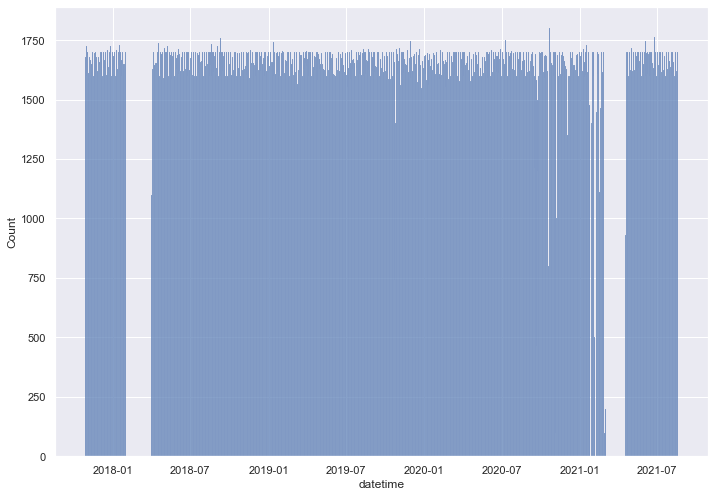

In [2]:
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('/Users/tsadoq/Desktop/crawler_reddit/data', "*.csv"))))
df["datetime"] = pd.to_datetime(df['created_utc'], unit='s')
dataframe_countries = pd.DataFrame(countries)
country_list = list(dataframe_countries["name"])
initial_size = df.size
print("Initial size: {}".format(initial_size))
display(df.head(10))
sns.histplot(data=df,x='datetime',bins=1000)

Purged size: 10179967
95.50% of the initial dataset remaining


,Unnamed: 0,body,author_flair_text,permalink,author,created_utc,datetime
0,0,China and the US help companies by creating go...,NaN,/r/europe/comments/91y3o9/germanys_falling_beh...,populationinversion,1.532754e+09,2018-07-28 05:01:17
1,1,Human zoos were predominately western. I love ...,NaN,/r/europe/comments/92hgjr/german_poster_from_1...,Niko_12,1.532754e+09,2018-07-28 05:01:28
2,2,If wildfires are the worst thing that New Demo...,United States of America,/r/europe/comments/92et9b/greek_pm_takes_respo...,vokegaf,1.532754e+09,2018-07-28 05:01:46
3,3,When Hans Christian Andersen was alive it took...,Denmark,/r/europe/comments/92fd95/man_in_snail_costume...,Econ_Orc,1.532754e+09,2018-07-28 05:02:05
4,4,This isn't even the worst train I've seen in H...,USA/Hungary,/r/europe/comments/92fd95/man_in_snail_costume...,Agothro,1.532754e+09,2018-07-28 05:02:20
7,7,Exit strategy is how VCs make money. Lack of e...,NaN,/r/europe/comments/91y3o9/germanys_falling_beh...,populationinversion,1.532754e+09,2018-07-28 05:03:33
8,8,Absolutely not true. There were only about 160...,NaN,/r/europe/comments/92ffps/beware_chinese_troja...,ImBatman-,1.532754e+09,2018-07-28 05:05:58
10,10,The people who voted Hitler into power,NaN,/r/europe/comments/92fxcj/north_should_prepare...,naughtyusmax,1.532754e+09,2018-07-28 05:07:32
11,11,&gt;Seeing how things are going I don't think ...,Europe,/r/europe/comments/92cfhl/turkey_surpassed_gre...,jamiryo-,1.532754e+09,2018-07-28 05:07:47
13,13,I see thanks for the info! What sort of apartm...,NaN,/r/europe/comments/92f17y/czech_republic_runs_...,usedtobeneet26,1.532754e+09,2018-07-28 05:08:11


<AxesSubplot:xlabel='datetime', ylabel='Count'>

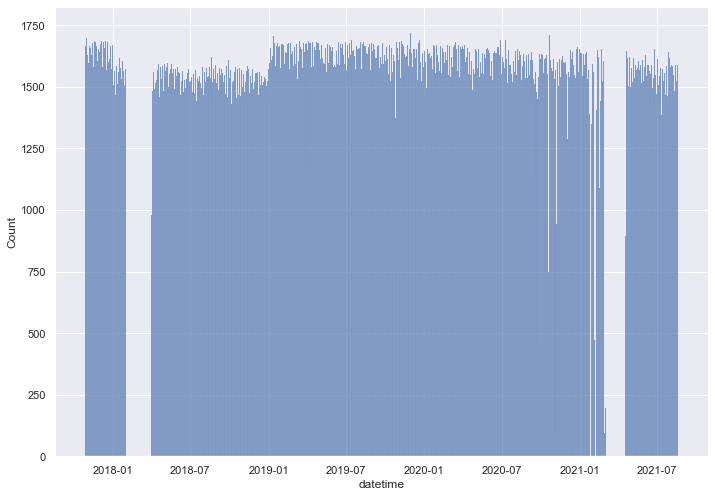

In [3]:
purged_df = df[(df['body']!="[removed]") & (df['body'] != "[deleted]")]
purged_size = purged_df.size
print("Purged size: {}".format(purged_size))
print(f"{purged_size/initial_size*100:.2f}% of the initial dataset remaining")
display(purged_df.head(10))
sns.histplot(data=purged_df,x='datetime',bins=1000)

In [4]:
purged_df["author_flair_text"] = purged_df["author_flair_text"].str.extract(f"({'|'.join(country_list)})", flags=re.I) # runs for long time

<ipython-input-4-19af359b6397>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purged_df["author_flair_text"] = purged_df["author_flair_text"].str.extract(f"({'|'.join(country_list)})", flags=re.I) # runs for long time


In [5]:
display(purged_df.head())
display(dataframe_countries.head())

,Unnamed: 0,body,author_flair_text,permalink,author,created_utc,datetime
0,0,China and the US help companies by creating go...,NaN,/r/europe/comments/91y3o9/germanys_falling_beh...,populationinversion,1.532754e+09,2018-07-28 05:01:17
1,1,Human zoos were predominately western. I love ...,NaN,/r/europe/comments/92hgjr/german_poster_from_1...,Niko_12,1.532754e+09,2018-07-28 05:01:28
2,2,If wildfires are the worst thing that New Demo...,United States of America,/r/europe/comments/92et9b/greek_pm_takes_respo...,vokegaf,1.532754e+09,2018-07-28 05:01:46
3,3,When Hans Christian Andersen was alive it took...,Denmark,/r/europe/comments/92fd95/man_in_snail_costume...,Econ_Orc,1.532754e+09,2018-07-28 05:02:05
4,4,This isn't even the worst train I've seen in H...,Hungary,/r/europe/comments/92fd95/man_in_snail_costume...,Agothro,1.532754e+09,2018-07-28 05:02:20


,name,alpha2,alpha3,numeric,apolitical_name
0,Afghanistan,AF,AFG,004,Afghanistan
1,Åland Islands,AX,ALA,248,Åland Islands
2,Albania,AL,ALB,008,Albania
3,Algeria,DZ,DZA,012,Algeria
4,American Samoa,AS,ASM,016,American Samoa


In [6]:
purged_df.rename(columns = {"author_flair_text":"country_name"}, inplace=True)
dataframe_countries.rename(columns = {"name":"country_name"}, inplace=True)

cleaned_df = purged_df.merge(dataframe_countries, on="country_name", how="inner")

/Users/tsadoq/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Cleaned size: 5214187
48.92% of the initial dataset remaining


,Unnamed: 0,body,country_name,permalink,author,created_utc,datetime,alpha2,alpha3,numeric,apolitical_name
0,2,If wildfires are the worst thing that New Demo...,United States of America,/r/europe/comments/92et9b/greek_pm_takes_respo...,vokegaf,1.532754e+09,2018-07-28 05:01:46,US,USA,840,United States of America
1,25,"You know what they mean when they say it, though.",United States of America,/r/europe/comments/92dlv9/theresa_mays_attempt...,vokegaf,1.532755e+09,2018-07-28 05:21:58,US,USA,840,United States of America
2,30,https://en.wikipedia.org/wiki/List_of_scandals...,United States of America,/r/europe/comments/92dga5/french_watergate_tak...,vokegaf,1.532756e+09,2018-07-28 05:26:14,US,USA,840,United States of America
3,66,https://en.wikipedia.org/wiki/Age_of_consent\n...,United States of America,/r/europe/comments/92b02k/with_antimuslim_laws...,vokegaf,1.532757e+09,2018-07-28 05:43:00,US,USA,840,United States of America
4,78,&gt; City prices in the United States are sky ...,United States of America,/r/europe/comments/92bunt/germany_moves_to_pro...,vokegaf,1.532757e+09,2018-07-28 05:49:28,US,USA,840,United States of America
5,92,"For what it's worth, I'm Agnostic. But looking...",United States of America,/r/europe/comments/924mwg/father_jacques_hamel...,-NotACrabPerson-,1.532758e+09,2018-07-28 06:00:32,US,USA,840,United States of America
6,93,Other way around. They have a plurality but n...,United States of America,/r/europe/comments/92btts/the_british_public_n...,vokegaf,1.532758e+09,2018-07-28 06:01:21,US,USA,840,United States of America
7,102,"&gt;For crop researchers and scientists, the r...",United States of America,/r/europe/comments/92fvji/europe_applies_stric...,vokegaf,1.532747e+09,2018-07-28 03:03:03,US,USA,840,United States of America
8,118,Such a beautiful city! I need to go back,United States of America,/r/europe/comments/92cf2u/europe_weather_repor...,WestenM,1.532748e+09,2018-07-28 03:22:04,US,USA,840,United States of America
9,124,this is the kind of in depth discussion i come...,United States of America,/r/europe/comments/92dnvy/macron_not_in_favour...,qiv,1.532749e+09,2018-07-28 03:29:54,US,USA,840,United States of America


<AxesSubplot:xlabel='datetime', ylabel='Count'>

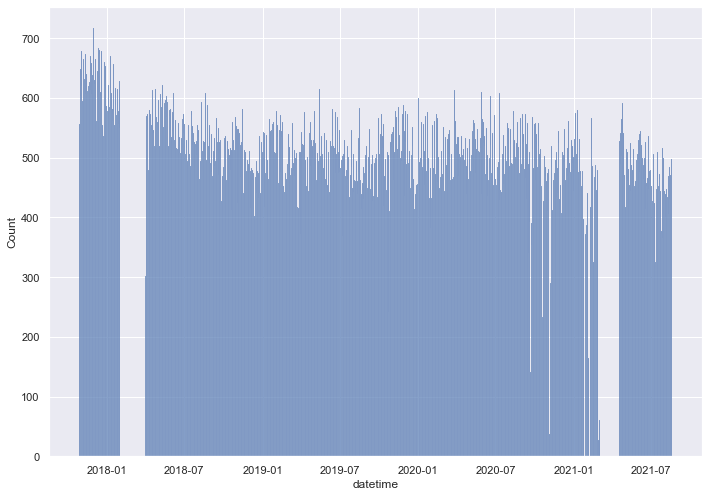

In [7]:
cleaned_size = cleaned_df.size
print(f"Cleaned size: {cleaned_size}")
print(f"{cleaned_size/initial_size*100:.2f}% of the initial dataset remaining")
display(cleaned_df.head(10))
sns.histplot(data=cleaned_df,x='datetime',bins=1000)

<AxesSubplot:xlabel='count', ylabel='country_name'>

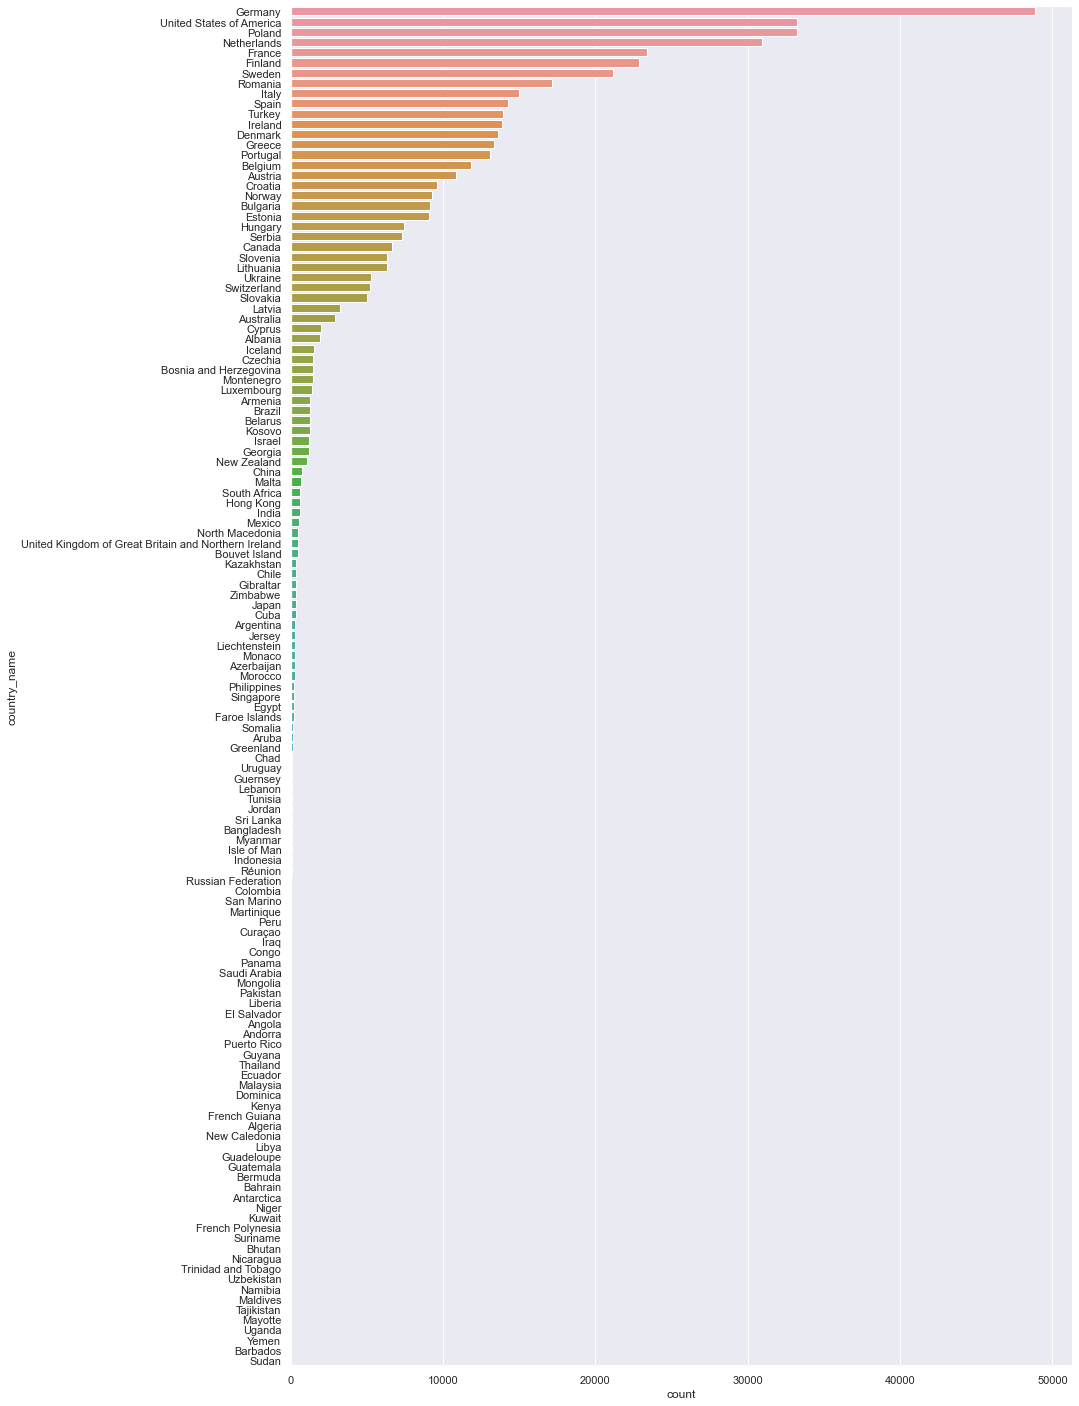

In [8]:
plt.figure(figsize=(14,25))
sns.countplot(data=cleaned_df,y='country_name', order = cleaned_df['country_name'].value_counts().index)

In [11]:
chunks = np.array_split(cleaned_df, 20)


In [18]:
i = 1
for chunk in tqdm(chunks):
    filename = str(i).zfill(2)
    chunk.to_csv(f"/Users/tsadoq/Desktop/crawler_reddit/cleaned_data/{filename}.csv", index=False)
    i+=1

100%|██████████| 20/20 [00:07<00:00,  2.64it/s]
